In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
temp = pd.read_csv("Temperature.csv")
#importing the train and test file
pd.set_option('display.max_columns', None)
temp


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Exploratory Data Analysis 

We can see that there are 2 target variables. Therefore Target variable will have two columns (Next_Tmax and Next_Tmin)

In [3]:
temp.isnull().sum() # checking for null values in test data

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we can see that there a alot of null values. 

we can see that there are only 2 null values in station and date. We can drop them as it wont effect the dataset

In [4]:
temp.dropna(subset = ['station'],inplace=True)
temp.dropna(subset = ['Next_Tmax'],inplace=True)
temp.dropna(subset = ['Next_Tmin'],inplace=True)

In [5]:
temp.isnull().sum()

station              0
Date                 0
Present_Tmax        60
Present_Tmin        60
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax            0
Next_Tmin            0
dtype: int64

In [6]:
temp.corr()["Next_Tmax"].sort_values(ascending=False) 
#identifying important features with target varible

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835606
Next_Tmin           0.620119
Present_Tmax        0.612084
LDAPS_Tmin_lapse    0.591945
Present_Tmin        0.471963
LDAPS_LH            0.156993
station             0.108306
Solar radiation     0.007025
lon                 0.001306
lat                -0.055327
Slope              -0.104535
LDAPS_PPT1         -0.125929
DEM                -0.174521
LDAPS_PPT2         -0.187029
LDAPS_PPT4         -0.188317
LDAPS_PPT3         -0.204616
LDAPS_RHmax        -0.290102
LDAPS_WS           -0.351797
LDAPS_RHmin        -0.446496
LDAPS_CC4          -0.453908
LDAPS_CC1          -0.460129
LDAPS_CC2          -0.498909
LDAPS_CC3          -0.523502
Name: Next_Tmax, dtype: float64

In [7]:
temp['Present_Tmax'].fillna(temp['Present_Tmax'].mean(),inplace=True)
temp['Present_Tmin'].fillna(temp['Present_Tmin'].mean(),inplace=True)
temp['LDAPS_RHmin'].fillna(temp['LDAPS_RHmin'].mean(),inplace=True)
temp['LDAPS_RHmax'].fillna(temp['LDAPS_RHmax'].mean(),inplace=True)
temp['LDAPS_Tmax_lapse'].fillna(temp['LDAPS_Tmax_lapse'].mean(),inplace=True)
temp['LDAPS_Tmin_lapse'].fillna(temp['LDAPS_Tmin_lapse'].mean(),inplace=True)
temp['LDAPS_WS'].fillna(temp['LDAPS_WS'].mean(),inplace=True)
temp['LDAPS_LH'].fillna(temp['LDAPS_LH'].mean(),inplace=True)
temp['LDAPS_CC1'].fillna(temp['LDAPS_CC1'].mean(),inplace=True)
temp['LDAPS_CC2'].fillna(temp['LDAPS_CC2'].mean(),inplace=True)
temp['LDAPS_CC3'].fillna(temp['LDAPS_CC3'].mean(),inplace=True)
temp['LDAPS_CC4'].fillna(temp['LDAPS_CC4'].mean(),inplace=True)
temp['LDAPS_PPT1'].fillna(temp['LDAPS_PPT1'].mean(),inplace=True)
temp['LDAPS_PPT2'].fillna(temp['LDAPS_PPT2'].mean(),inplace=True)
temp['LDAPS_PPT3'].fillna(temp['LDAPS_PPT3'].mean(),inplace=True)
temp['LDAPS_PPT4'].fillna(temp['LDAPS_PPT4'].mean(),inplace=True)

In [8]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
temp.corr()["Next_Tmin"].sort_values(ascending=False) 
#identifying important features with target varible

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.881342
Present_Tmin        0.796415
Present_Tmax        0.622235
Next_Tmax           0.620119
LDAPS_Tmax_lapse    0.586571
station             0.128719
Solar radiation     0.118717
LDAPS_RHmin         0.092969
LDAPS_CC2           0.029691
LDAPS_PPT1          0.017086
LDAPS_PPT2         -0.012719
LDAPS_CC1          -0.012768
lon                -0.048763
LDAPS_CC3          -0.056762
LDAPS_LH           -0.058755
LDAPS_PPT3         -0.068878
LDAPS_RHmax        -0.075364
lat                -0.085599
LDAPS_CC4          -0.087183
LDAPS_WS           -0.100941
LDAPS_PPT4         -0.110478
Slope              -0.148947
DEM                -0.249255
Name: Next_Tmin, dtype: float64

In [10]:
temp.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113068,0.132188,-0.068285,-0.168195,0.070062,0.104919,0.004444,-0.132215,0.005876,0.002184,-0.000413,0.005160,-0.003539,-0.009600,-0.014191,-0.011564,-0.238460,-0.118755,-0.257215,-0.091449,-0.020255,0.108306,0.128719
Present_Tmax,0.113068,1.000000,0.617749,-0.206953,-0.304556,0.568932,0.623175,-0.124903,0.133108,-0.313537,-0.215114,-0.144980,-0.141381,-0.113868,-0.103758,-0.126289,-0.105282,-0.054255,0.007439,-0.188650,-0.106727,-0.026797,0.609838,0.622235
Present_Tmin,0.132188,0.617749,1.000000,0.120531,-0.018345,0.462196,0.762384,-0.038305,-0.012673,0.083284,0.088942,-0.004630,-0.045939,0.110139,0.065323,-0.051836,-0.068798,-0.080914,-0.045411,-0.252359,-0.147869,0.051451,0.470231,0.796415
LDAPS_RHmin,-0.068285,-0.206953,0.120531,1.000000,0.578708,-0.568968,0.086273,0.291812,-0.072808,0.613201,0.744980,0.688652,0.512801,0.260374,0.390614,0.237664,0.165221,0.085414,-0.077668,0.101430,0.122570,0.242477,-0.442575,0.092969
LDAPS_RHmax,-0.168195,-0.304556,-0.018345,0.578708,1.000000,-0.377209,-0.117417,0.132796,0.237706,0.436276,0.391003,0.225859,0.129282,0.268282,0.228162,0.132484,0.115835,0.194563,0.024993,0.176848,0.218913,0.147966,-0.287554,-0.075364
LDAPS_Tmax_lapse,0.070062,0.568932,0.462196,-0.568968,-0.377209,1.000000,0.653320,-0.316285,0.044499,-0.440665,-0.526132,-0.543809,-0.431253,-0.116574,-0.249063,-0.194624,-0.166970,-0.044057,0.090174,-0.180786,-0.163377,0.046247,0.828267,0.586571
LDAPS_Tmin_lapse,0.104919,0.623175,0.762384,0.086273,-0.117417,0.653320,1.000000,-0.133353,-0.138403,0.008993,0.045908,-0.045772,-0.081777,0.034450,-0.002782,-0.093480,-0.099826,-0.098540,-0.026887,-0.196883,-0.186902,0.157899,0.586746,0.881342
LDAPS_WS,0.004444,-0.124903,-0.038305,0.291812,0.132796,-0.316285,-0.133353,1.000000,0.003230,0.287090,0.258623,0.239415,0.218480,0.143133,0.183197,0.148422,0.132244,0.033959,-0.063031,0.189009,0.168964,0.121241,-0.348707,-0.100941
LDAPS_LH,-0.132215,0.133108,-0.012673,-0.072808,0.237706,0.044499,-0.138403,0.003230,1.000000,-0.148572,-0.265604,-0.247322,-0.173811,-0.019108,-0.084894,0.009076,0.012848,0.131417,0.024023,0.054989,0.086688,-0.047341,0.155614,-0.058755
LDAPS_CC1,0.005876,-0.313537,0.083284,0.613201,0.436276,-0.440665,0.008993,0.287090,-0.148572,1.000000,0.779291,0.516487,0.360310,0.447020,0.389797,0.167147,0.089078,-0.009449,-0.008468,-0.014951,-0.021798,0.217724,-0.456087,-0.012768


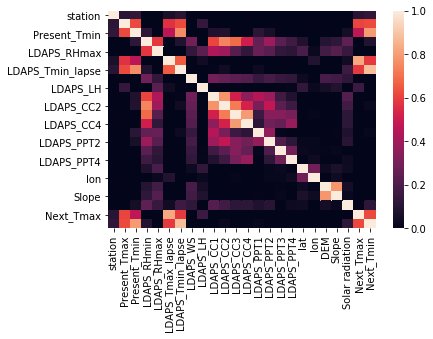

In [11]:
sns.heatmap(temp.corr(), vmin=0, vmax=1)
plt.show()

we can see that the independent variables are not very highly correlated. 

In [12]:
temp.corr()["Next_Tmax"].sort_values(ascending=False) 
#identifying important features with target varible 'Next_Tmax'

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.828267
Next_Tmin           0.620119
Present_Tmax        0.609838
LDAPS_Tmin_lapse    0.586746
Present_Tmin        0.470231
LDAPS_LH            0.155614
station             0.108306
Solar radiation     0.007025
lon                 0.001306
lat                -0.055327
Slope              -0.104535
LDAPS_PPT1         -0.124823
DEM                -0.174521
LDAPS_PPT2         -0.185386
LDAPS_PPT4         -0.186663
LDAPS_PPT3         -0.202819
LDAPS_RHmax        -0.287554
LDAPS_WS           -0.348707
LDAPS_RHmin        -0.442575
LDAPS_CC4          -0.449921
LDAPS_CC1          -0.456087
LDAPS_CC2          -0.494527
LDAPS_CC3          -0.518904
Name: Next_Tmax, dtype: float64

In [13]:
temp.corr()["Next_Tmin"].sort_values(ascending=False) 
#identifying important features with target varible 'Next_Tmin'

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.881342
Present_Tmin        0.796415
Present_Tmax        0.622235
Next_Tmax           0.620119
LDAPS_Tmax_lapse    0.586571
station             0.128719
Solar radiation     0.118717
LDAPS_RHmin         0.092969
LDAPS_CC2           0.029691
LDAPS_PPT1          0.017086
LDAPS_PPT2         -0.012719
LDAPS_CC1          -0.012768
lon                -0.048763
LDAPS_CC3          -0.056762
LDAPS_LH           -0.058755
LDAPS_PPT3         -0.068878
LDAPS_RHmax        -0.075364
lat                -0.085599
LDAPS_CC4          -0.087183
LDAPS_WS           -0.100941
LDAPS_PPT4         -0.110478
Slope              -0.148947
DEM                -0.249255
Name: Next_Tmin, dtype: float64

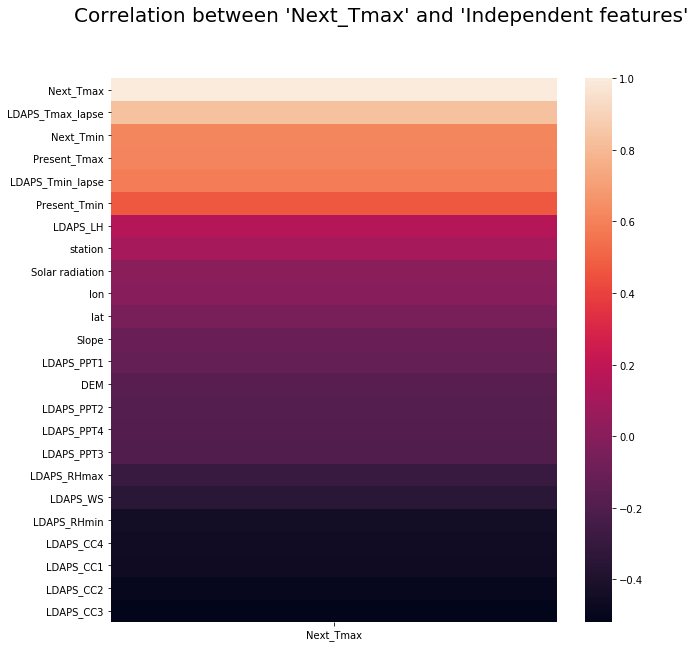

In [14]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'Next_Tmax' and 'Independent features'",fontsize=20)
b=sns.heatmap(temp.corr()[["Next_Tmax"]].sort_values("Next_Tmax"));
b.invert_yaxis()
#important features

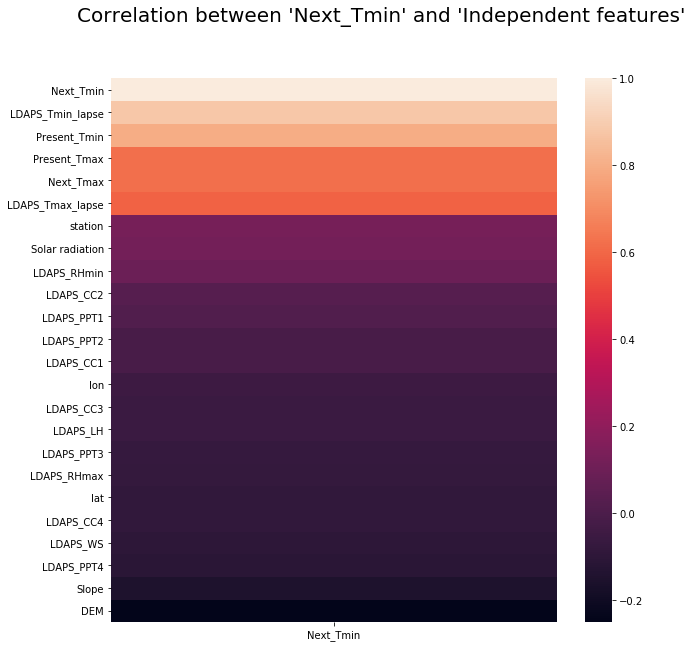

In [15]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'Next_Tmin' and 'Independent features'",fontsize=20)
b=sns.heatmap(temp.corr()[["Next_Tmin"]].sort_values("Next_Tmin"));
b.invert_yaxis()
#important features

Important features in descending order for Next_Tmax and Next_Tmin

# Analysing Target variables with Independent variables

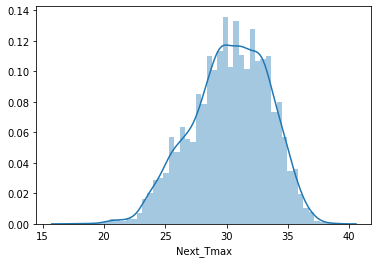

In [16]:
sns.distplot(temp['Next_Tmax'])
plt.show()

we can see that 'Next_Tmax' is following normal distribution

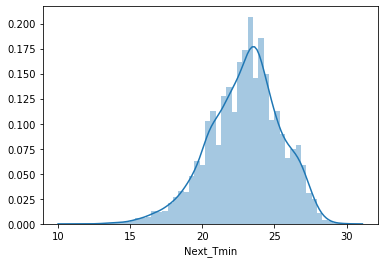

In [17]:
sns.distplot(temp['Next_Tmin'])
plt.show()

we can see that 'Next_Tmin' is also following normal distribution

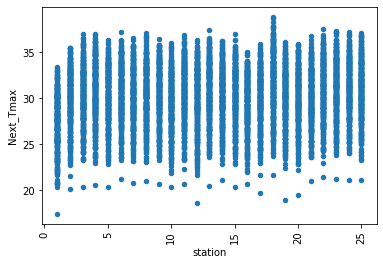

In [18]:
temp.plot(x ='station', y='Next_Tmax', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()
#scatter plot of Next_Tmax recorded by stations 1 to 25

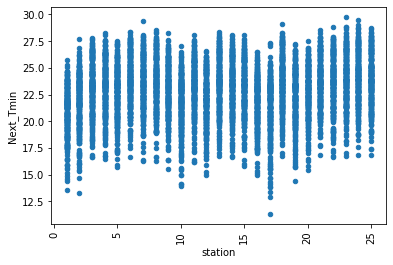

In [19]:
temp.plot(x ='station', y='Next_Tmin', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()
#scatter plot of Next_Tmin recorded by stations 1 to 25

# Splitting of train data into Independent and Target variables

In [20]:
tar=temp[['Next_Tmax','Next_Tmin']]
ind=temp.drop(['Next_Tmax','Next_Tmin'],axis=1)

#splitting individual and target variable in ind and tar

In [21]:
ind=temp
ind.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation']]=scaler.fit_transform(temp[['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','lat','lon','DEM','Slope','Solar radiation']])

In [23]:
ind['Date']= pd.to_datetime(ind['Date'])

ind['day'] = ind['Date'].dt.day
ind['month'] = ind['Date'].dt.month
ind['year'] = ind['Date'].dt.year


# we can drop 'Date'  as we have all the information in 'day','month' and 'year'

ind.drop('Date',axis=1,inplace=True)


In [24]:
ind

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,0.494318,0.543011,0.488518,0.783659,0.499546,0.569132,0.207447,0.365853,0.241862,0.210559,1.643614e-01,0.134325,0.0,0.0,0.0,0.0,0.786017,0.533981,1.000000,0.528870,1.000000,29.1,21.2,30,6,2013
1,2.0,0.676136,0.553763,0.412406,0.771200,0.584480,0.636121,0.148053,0.288703,0.233137,0.260000,1.620714e-01,0.131041,0.0,0.0,0.0,0.0,0.786017,0.666667,0.161990,0.081816,0.925703,30.5,22.5,30,6,2013
2,3.0,0.659091,0.645161,0.367024,0.609716,0.595982,0.670697,0.171575,0.150545,0.216426,0.265884,2.074546e-01,0.145813,0.0,0.0,0.0,0.0,0.643008,0.750809,0.104702,0.032994,0.922242,31.1,23.9,30,6,2013
3,4.0,0.681818,0.650538,0.488316,0.914366,0.577497,0.589934,0.145848,0.349446,0.223692,0.233388,1.638130e-01,0.137732,0.0,0.0,0.0,0.0,1.000000,0.634304,0.166759,0.479615,0.918280,31.7,24.3,30,6,2013
4,5.0,0.647727,0.569892,0.462078,0.760251,0.549257,0.600379,0.150325,0.535505,0.156529,0.258165,1.818403e-01,0.174432,0.0,0.0,0.0,0.0,0.500530,1.000000,0.113360,0.080123,0.919835,31.2,22.5,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,0.176136,0.349462,0.062166,0.470611,0.487049,0.262621,0.196083,0.102271,0.054692,0.031155,0.000000e+00,0.004494,0.0,0.0,0.0,0.0,0.500530,0.692557,0.069652,0.093234,0.076053,27.6,17.7,30,8,2017
7746,22.0,0.142045,0.327957,0.130829,0.602811,0.434088,0.230759,0.152068,0.421774,0.068709,0.025320,5.946399e-07,0.018136,0.0,0.0,0.0,0.0,0.286017,0.841424,0.047992,0.006831,0.067503,28.0,17.1,30,8,2017
7747,23.0,0.187500,0.311828,0.088234,0.485429,0.417221,0.293420,0.172139,0.377335,0.031050,0.083683,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.429025,0.210356,0.016091,0.011201,0.068411,28.3,18.1,30,8,2017
7748,24.0,0.187500,0.344086,0.053931,0.447077,0.448683,0.290673,0.192898,0.268018,0.037087,0.077412,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.357521,0.268608,0.024632,0.024372,0.065441,28.6,18.8,30,8,2017


# Data Modeling and prediciton

In [25]:
from sklearn.model_selection import train_test_split

# splitting data into training and testing 
ind_train, ind_test, tar_train, tar_test = train_test_split(ind, tar, test_size=0.33, random_state=42)

In [26]:
len(ind_train),len(ind_test),len( tar_train),len(tar_test)

(5174, 2549, 5174, 2549)

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [28]:
knn = KNeighborsRegressor()
svm = SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr= LinearRegression()

In [29]:
for m in [knn,dt,rf]:
    m.fit(ind_train,tar_train)
    train_predict = m.predict(ind_train)
    test_predict = m.predict(ind_test)
    print('for',m)
    print("RMSE :", np.sqrt(mean_squared_error(tar_train, train_predict)))
    print("RMSE :", np.sqrt(mean_squared_error(tar_test, test_predict)))
    print("Train R^2: ", r2_score(tar_train, train_predict))
    print("Test R^2: ", r2_score(tar_test, test_predict))

for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RMSE : 0.412548951072853
RMSE : 0.5118188859245203
Train R^2:  0.9776707538426772
Test R^2:  0.9646929174730541
for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RMSE : 7.157422320238437e-16
RMSE : 0.16991794110250155
Train R^2:  1.0
Test R^2:  0.9960955185997673
for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None,

In [30]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             ind_train,
                             tar_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [31]:
for i in [knn,dt,rf]:
    print('for',i)
    print(get_cv_scores(i))


for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
CV Mean:  0.9594514428867305
STD:  0.0025447458682582576


None
for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
CV Mean:  0.9946108902725002
STD:  0.0004295629498751718


None
for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples

According to Cross val score and accuracy we can see that the RandomForesrClassifer has the least difference between Accuracy and Cross val score, therefore we select RandomForesrClassifer model.

To get the best parameters and best results we use GridSearchCV

In [ ]:
# To find the best parameters by using GridSearchCV to improve the model
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mse','mae'],'max_features': ['auto','sqrt','log2']}
rf=RandomForestRegressor()
gs=GridSearchCV(rf,parameters)
gs.fit(ind_train,tar_train)
print(gs.best_params_)
#best parameters

Therefore we can save the model

In [33]:
import joblib
joblib.dump(rf,'Temperature Forecast Project using ML.obj') #save the model as object file


['Temperature Forecast Project using ML.obj']